In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mnist = pd.read_csv('mnist_train.csv',header=None)#60000examples784attribute2class
mnist_test = pd.read_csv('mnist_test.csv',header=None)#10000examples784attribute2class
print(mnist.shape)
print(mnist_test.shape)
import time

E:\python\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
E:\python\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
E:\python\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


(60000, 785)
(10000, 785)


In [2]:
attribute = mnist.loc[:,mnist.columns!=0] # label attribure seperate
label = mnist.loc[:,mnist.columns==0]
attribute1 = mnist_test.loc[:,mnist_test.columns!=0] # label attribure seperate
label1 = mnist_test.loc[:,mnist_test.columns==0]

In [3]:
attribute_array=attribute.copy().values # covert to array
label_array=label.copy().values
attribute1_array=attribute1.copy().values # covert to array
label1_array=label1.copy().values

In [4]:
# data process
print(len(label_array))
for index,value in enumerate(label_array):
    if value % 2 ==0:
        label_array[index]= 1     # even is 1
    else:
        label_array[index]= -1   # odd is 1
        
print(len(label1_array))
for index,value in enumerate(label1_array):
    if value % 2 ==0:
        label1_array[index]= 1     # even is 1
    else:
        label1_array[index]= -1   # odd is 1        

60000
10000


In [5]:
attribute_array=attribute_array/255 # normalize
attribute1_array=attribute1_array/255 # normalize

In [6]:
x_train=attribute_array
y_train=label_array
x_test=attribute1_array
y_test=label1_array

In [7]:
# benchmark
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver='saga', tol=0.1)
tbegin = time.time()
clf.fit(x_train, y_train.ravel())
tend = time.time()
score = clf.score(x_train, y_train)
score1 = clf.score(x_test, y_test)
print("benchmark testing mnist accuracy: %f " % score1 )
print ("benchmark training time : %f sec" % (tend - tbegin))
print("benchmark traing mnist accuracy: %f " % score )

benchmark testing mnist accuracy: 0.899100 
benchmark training time : 3.494844 sec
benchmark traing mnist accuracy: 0.900883 


In [8]:
# adam parameter
m, dim = x_train.shape
theta = np.zeros(dim)  # 参数
alpha = 0.01  # 学习率
iterations = 2500  # 迭代次数
b1 = 0.95  
b2 = 0.999  
e = 0.000000001  #epilson
mt = np.zeros(dim)
vt = np.zeros(dim)

In [9]:
# momentum parameter
m1, dim1 = x_train.shape
theta1 = np.zeros(dim1)  # 参数
alpha1 = 0.01  # 学习率
momentum1 = 0.1  # 冲量
iterations1 = 1700  # 迭代次数
gradient1 = 0  # 初始梯度为0

In [10]:
# algorithm adam no minibatch
tStart = time.time()
tmp_theta=[]
tmp_iteration=[]
tmp_time=[]
totaltime=0
for i in range(iterations):
    tmp_tStart=time.time()
    j = i % m
    gradient = (1/1)* ((-np.exp(-y_train[j]*np.dot(x_train[j], theta))*y_train[j]*x_train[j]/(1+np.exp(-y_train[j]*np.dot(x_train[j], theta))))+0.001*np.sign(theta))  #theta key point
    mt = b1 * mt + (1 - b1) * gradient
    vt = b2 * vt + (1 - b2) * (gradient**2)
    mtt = mt / (1 - (b1**(i + 1)))
    vtt = vt / (1 - (b2**(i + 1)))
    theta = theta - alpha * mtt / ((vtt**(1/2)) + e)
    tmp_tEnd=time.time()
    totaltime = totaltime + (tmp_tEnd-tmp_tStart)
    if (i+1) % 50 ==0:
        tmp_theta.append(theta)
        tmp_iteration.append(i+1)
        tmp_time.append(totaltime)
tEnd = time.time()
print ("training time adam: %f sec" % (tEnd - tStart))

training time adam: 0.173536 sec


In [11]:
# algorithm momentum no minibatch
tStart = time.time()
tmp1_theta=[]
tmp1_iteration=[]
tmp1_time=[]
totaltime1=0
for i in range(iterations1):
    tmp1_tStart=time.time()
    j = i % m1
    gradient1 = momentum1 * gradient1 + alpha1 *(1/1)* ((-np.exp(-y_train[j]*np.dot(x_train[j], theta1))*y_train[j]*x_train[j]/(1+np.exp(-y_train[j]*np.dot(x_train[j], theta1))))+0.001*np.sign(theta1))  #theta key point
    theta1 -= gradient1
    tmp1_tEnd=time.time()
    totaltime1 = totaltime1 + (tmp1_tEnd-tmp1_tStart)
    if (i+1) % 50 ==0:
        tmp1_theta.append(theta1)
        tmp1_iteration.append(i+1)
        tmp1_time.append(totaltime1)   
tEnd = time.time()
print ("training time momentum: %f sec" % (tEnd - tStart))

training time momentum: 0.066850 sec


In [12]:
# predict training lable by adam
logic=np.dot(x_train,theta)
for i in range(len(logic)):
    if logic[i]<0:
        logic[i]=-1
    else:
        logic[i]=1
predict_label=logic
predict_label[0:10] 

array([-1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.])

In [13]:
# calculate training accuracy adam
error_verify=[]
for i in range(len(y_train)):
    error_verify.append(y_train[i]*logic[i])

count=0
for i in range(len(error_verify)):
    if error_verify[i]>0:
        count=count+1
        
accuracy=count/len(error_verify)
print("training accuracy adam: %f " % accuracy )

training accuracy adam: 0.841367 


In [14]:
# calculate training accuracy momentum
logic2=np.dot(x_train,theta1)
error2_verify=[]
for i in range(len(y_train)):
    error2_verify.append(y_train[i]*logic2[i])

count2=0
for i in range(len(error2_verify)):
    if error2_verify[i]>0:
        count2=count2+1
        
accuracy2=count2/len(error2_verify)
print("training accuracy momentum: %f " % accuracy2 )

training accuracy momentum: 0.835233 


In [15]:
# calculate testing accuracy adam
logic1=np.dot(x_test,theta)
error1_verify=[]
for i in range(len(y_test)):
    error1_verify.append(y_test[i]*logic1[i])

count1=0
for i in range(len(error1_verify)):
    if error1_verify[i]>0:
        count1=count1+1
        
accuracy1=count1/len(error1_verify)
print("testing accuracy adam: %f " % accuracy1 )

testing accuracy adam: 0.849600 


In [16]:
# calculate testing accuracy momentum
logic2=np.dot(x_test,theta1)
error2_verify=[]
for i in range(len(y_test)):
    error2_verify.append(y_test[i]*logic2[i])

count2=0
for i in range(len(error2_verify)):
    if error2_verify[i]>0:
        count2=count2+1
        
accuracy2=count2/len(error2_verify)
print("testing accuracy momentum: %f " % accuracy2 )

testing accuracy momentum: 0.835800 


In [17]:
# calculate itrtations v.s. training error adam
logic_tmp=[]
for i in range(len(tmp_theta)):
    logic_tmp.append(np.dot(x_train,tmp_theta[i]))
    
total_verify=[]
for k in range(len(tmp_theta)):
    error_verify=[]
    for i in range(len(y_train)):
        error_verify.append(y_train[i]*logic_tmp[k][i])
    total_verify.append(error_verify)
    
total_accuracy=[]
for k in range(len(total_verify)):
    count=0
    for i in range(len(total_verify[k])):
        if total_verify[k][i]>0:
            count=count+1
    total_accuracy.append(count/len(total_verify[k]))
    
error=[]
for i in range(len(total_accuracy)):
    error.append(1-total_accuracy[i])

In [18]:
# calculate itrtations v.s. training error momentum
logic2_tmp=[]
for i in range(len(tmp1_theta)):
    logic2_tmp.append(np.dot(x_train,tmp1_theta[i]))
    
total2_verify=[]
for k in range(len(tmp1_theta)):
    error2_verify=[]
    for i in range(len(y_train)):
        error2_verify.append(y_train[i]*logic2_tmp[k][i])
    total2_verify.append(error2_verify)
    
total2_accuracy=[]
for k in range(len(total2_verify)):
    count2=0
    for i in range(len(total2_verify[k])):
        if total2_verify[k][i]>0:
            count2=count2+1
    total2_accuracy.append(count2/len(total2_verify[k]))
    
error2=[]
for i in range(len(total2_accuracy)):
    error2.append(1-total2_accuracy[i])

In [19]:
# calculate itrtations v.s. testing error adam
logic1_tmp=[]
for i in range(len(tmp_theta)):
    logic1_tmp.append(np.dot(x_test,tmp_theta[i]))
    
total1_verify=[]
for k in range(len(tmp_theta)):
    error1_verify=[]
    for i in range(len(y_test)):
        error1_verify.append(y_test[i]*logic1_tmp[k][i])
    total1_verify.append(error1_verify)
    
total1_accuracy=[]
for k in range(len(total1_verify)):
    count1=0
    for i in range(len(total1_verify[k])):
        if total1_verify[k][i]>0:
            count1=count1+1
    total1_accuracy.append(count1/len(total1_verify[k]))
    
error1=[]
for i in range(len(total1_accuracy)):
    error1.append(1-total1_accuracy[i])

In [20]:
# calculate itrtations v.s. testing error momentum
logic3_tmp=[]
for i in range(len(tmp1_theta)):
    logic3_tmp.append(np.dot(x_test,tmp1_theta[i]))
    
total3_verify=[]
for k in range(len(tmp1_theta)):
    error3_verify=[]
    for i in range(len(y_test)):
        error3_verify.append(y_test[i]*logic3_tmp[k][i])
    total3_verify.append(error3_verify)
    
total3_accuracy=[]
for k in range(len(total3_verify)):
    count3=0
    for i in range(len(total3_verify[k])):
        if total3_verify[k][i]>0:
            count3=count3+1
    total3_accuracy.append(count3/len(total3_verify[k]))
    
error3=[]
for i in range(len(total3_accuracy)):
    error3.append(1-total3_accuracy[i])

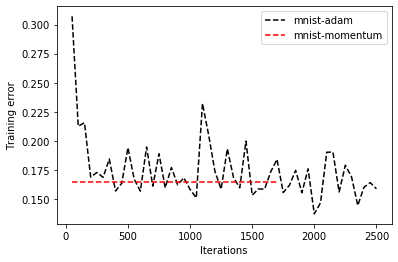

In [21]:
# plot training error v.s. iterations
plt.figure()
plt.plot(tmp_iteration,error,'k--',label="mnist-adam")
plt.plot(tmp1_iteration,error2,'r--',label="mnist-momentum")
plt.ylabel('Training error')
plt.xlabel('Iterations')
plt.legend()
plt.show()

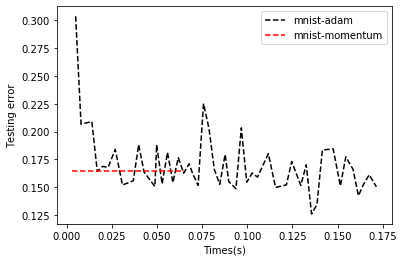

In [22]:
# plot testing error v.s. time(s)
plt.figure()
plt.plot(tmp_time,error1,'k--',label="mnist-adam")
plt.plot(tmp1_time,error3,'r--',label="mnist-momentum")
plt.ylabel('Testing error')
plt.xlabel('Times(s)')
plt.legend()
plt.show()